In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.decomposition import PCA

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
data = []
data_img = []
data_gray = []
data_red = []
data_green = []
data_blue = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        try:
            image = cv.imread(os.path.join(dirname, filename), cv.IMREAD_COLOR)
            image1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            gray_image = cv.resize(gray_image,(100,100))
            gray_image = gray_image.flatten()
            data_gray.append(gray_image)
            image2 = cv.resize(image1,(100,100))
            data_img.append(image2)
            red,green,blue = cv.split(image2)
            image3 = image2.flatten()
            red = red.flatten()
            green = green.flatten()
            blue = blue.flatten()
            data.append(image3)
            data_red.append(red)
            data_green.append(green)
            data_blue.append(blue)
        except:
            print("Empty File!!!")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Empty File!!!
Empty File!!!


In [3]:
data=np.array(data)
df =pd.DataFrame(data)
dfr =pd.DataFrame(data_red)
dfg =pd.DataFrame(data_green)
dfb =pd.DataFrame(data_blue)
imgs=np.asarray(data_img)
df

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,136,80,73,122,77,66,80,64,46,51,...,67,77,104,60,70,97,55,64,89,49
1,83,107,63,95,118,75,140,156,104,110,...,55,81,130,58,74,114,50,46,82,37
2,59,89,53,55,86,45,54,85,43,54,...,77,77,102,74,73,100,70,66,93,63
3,53,76,55,53,77,56,53,77,56,54,...,41,45,72,42,50,78,46,48,75,44
4,64,82,48,72,87,59,78,90,58,97,...,33,51,68,36,54,72,40,58,75,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,37,91,33,35,83,30,33,78,29,31,...,141,173,217,153,174,218,150,161,210,132
809,223,254,147,199,242,127,168,217,110,147,...,79,71,125,76,66,122,67,66,122,62
810,32,52,19,37,54,23,41,58,25,43,...,68,61,74,44,75,96,52,73,92,50
811,5,5,5,5,5,5,3,3,3,3,...,2,2,2,2,3,3,3,8,8,8


(100, 100, 3)

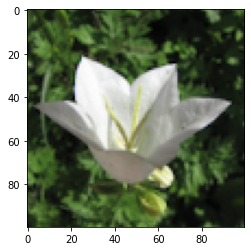

In [4]:
plt.imshow(data[50].reshape([100,100,3]))
np.shape(data_img[0])

In [9]:
# np.seterr(invalid='ignore')
pca_orig_dims = PCA(813)

data_comp_r = pca_orig_dims.fit_transform(dfr)
data_recov_r = pca_orig_dims.inverse_transform(data_comp_r)

data_comp_g = pca_orig_dims.fit_transform(dfg)
data_recov_g = pca_orig_dims.inverse_transform(data_comp_g)

data_comp_b = pca_orig_dims.fit_transform(dfb)
data_recov_b = pca_orig_dims.inverse_transform(data_comp_b)

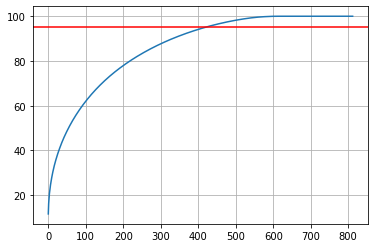

In [10]:
plt.grid()
plt.plot(np.cumsum(pca_orig_dims.explained_variance_ratio_*100))
plt.axhline(95,color='red')

In [11]:
img_compressed = (np.dstack((data_recov_r, data_recov_g, data_recov_b))).astype(np.uint8)

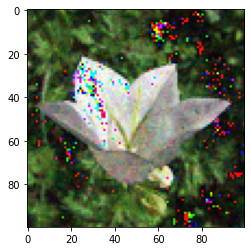

In [28]:
#Compressed Image at 450 Principal Components
plt.imshow(img_compressed[50].reshape([100,100,3]))

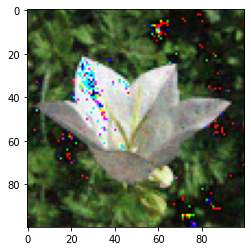

In [31]:
#Compressed Image at 500 Principal Components
plt.imshow(img_compressed[50].reshape([100,100,3]))

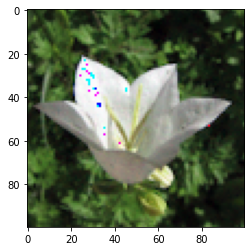

In [34]:
#Compressed Image at 550 Principal Components
plt.imshow(img_compressed[50].reshape([100,100,3]))

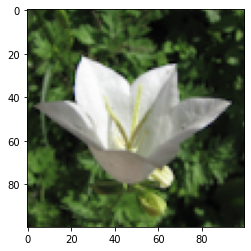

In [37]:
#Compressed Image at 650 Principal Components
plt.imshow(img_compressed[50].reshape([100,100,3]))

In [4]:
from sklearn.model_selection import train_test_split
data_img = np.array(data)
np.shape(data)
x_train, x_test = train_test_split(data,train_size=0.8, shuffle=True)
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255
np.shape(x_train)



(650, 30000)

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [81]:
autoencoder = Sequential()
autoencoder.add(Dense(10000, input_dim=30000, activation='relu'))
autoencoder.add(Dense(1200, activation='relu'))
autoencoder.add(Dense(200, activation='relu'))
autoencoder.add(Dense(1200, activation='relu'))
autoencoder.add(Dense(10000, activation='relu'))
autoencoder.add(Dense(30000, activation='sigmoid'))

autoencoder.compile(loss='mean_squared_error', optimizer='adamax', metrics=['accuracy'])

In [83]:
history = autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=1500, batch_size=64,shuffle = True)

Epoch 1/1500
11/11 [==============================] - 1s 108ms/step - loss: 1.8690e-04 - accuracy: 0.1292 - val_loss: 0.0313 - val_accuracy: 0.0368
Epoch 2/1500
11/11 [==============================] - 1s 99ms/step - loss: 1.6551e-04 - accuracy: 0.1400 - val_loss: 0.0313 - val_accuracy: 0.0307
Epoch 3/1500
11/11 [==============================] - 1s 98ms/step - loss: 1.4025e-04 - accuracy: 0.1400 - val_loss: 0.0313 - val_accuracy: 0.0307
Epoch 4/1500
11/11 [==============================] - 1s 101ms/step - loss: 1.3917e-04 - accuracy: 0.1323 - val_loss: 0.0313 - val_accuracy: 0.0307
Epoch 5/1500
11/11 [==============================] - 1s 102ms/step - loss: 1.6901e-04 - accuracy: 0.1538 - val_loss: 0.0314 - val_accuracy: 0.0491
Epoch 6/1500
11/11 [==============================] - 1s 99ms/step - loss: 1.7249e-04 - accuracy: 0.1508 - val_loss: 0.0313 - val_accuracy: 0.0368
Epoch 7/1500
11/11 [==============================] - 1s 98ms/step - loss: 1.5500e-04 - accuracy: 0.1446 - val_loss

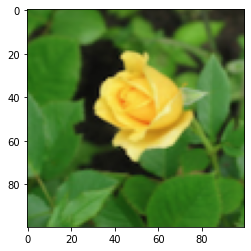

In [99]:
plt.imshow(np.reshape(x_test[75],(100,100,3)))

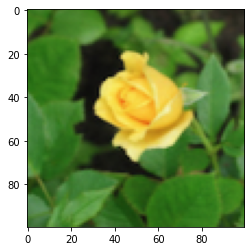

In [100]:
decoded_imgs = autoencoder.predict(x_test)
plt.imshow(np.reshape(decoded_imgs[75],(100,100,3)))

In [6]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
autoencoderNoise = Sequential()
autoencoderNoise.add(Dense(10000, input_dim=30000, activation='relu'))
autoencoderNoise.add(Dense(1200, activation='relu'))
autoencoderNoise.add(Dense(200, activation='relu'))
autoencoderNoise.add(Dense(1200, activation='relu'))
autoencoderNoise.add(Dense(10000, activation='relu'))
autoencoderNoise.add(Dense(30000, activation='sigmoid'))

autoencoderNoise.compile(loss='mean_squared_error', optimizer='adamax', metrics=['accuracy'])

2022-12-26 20:34:35.033317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 20:34:35.121134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 20:34:35.121958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 20:34:35.123622: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
historyNoise = autoencoderNoise.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=1000, batch_size=64,shuffle = True)

2022-12-26 20:38:06.672978: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
11/11 [==============================] - 3s 124ms/step - loss: 0.0815 - accuracy: 0.0000e+00 - val_loss: 0.0664 - val_accuracy: 0.0000e+00
Epoch 2/1000
11/11 [==============================] - 1s 106ms/step - loss: 0.0605 - accuracy: 0.0000e+00 - val_loss: 0.0560 - val_accuracy: 0.0000e+00
Epoch 3/1000
11/11 [==============================] - 1s 106ms/step - loss: 0.0563 - accuracy: 0.0000e+00 - val_loss: 0.0539 - val_accuracy: 0.0000e+00
Epoch 4/1000
11/11 [==============================] - 1s 100ms/step - loss: 0.0537 - accuracy: 0.0000e+00 - val_loss: 0.0522 - val_accuracy: 0.0000e+00
Epoch 5/1000
11/11 [==============================] - 1s 100ms/step - loss: 0.0517 - accuracy: 0.0000e+00 - val_loss: 0.0496 - val_accuracy: 0.0000e+00
Epoch 6/1000
11/11 [==============================] - 1s 101ms/step - loss: 0.0492 - accuracy: 0.0000e+00 - val_loss: 0.0473 - val_accuracy: 0.0000e+00
Epoch 7/1000
11/11 [==============================] - 1s 99ms/step - loss: 0.0480 - accu

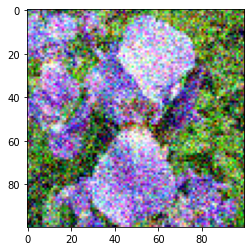

In [14]:
plt.imshow(np.reshape(x_test_noisy[72],(100,100,3)))

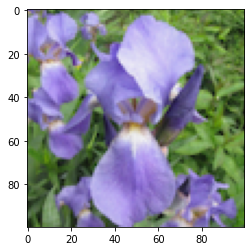

In [15]:
denoised_imgs = autoencoderNoise.predict(x_test)
plt.imshow(np.reshape(denoised_imgs[72],(100,100,3)))